In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


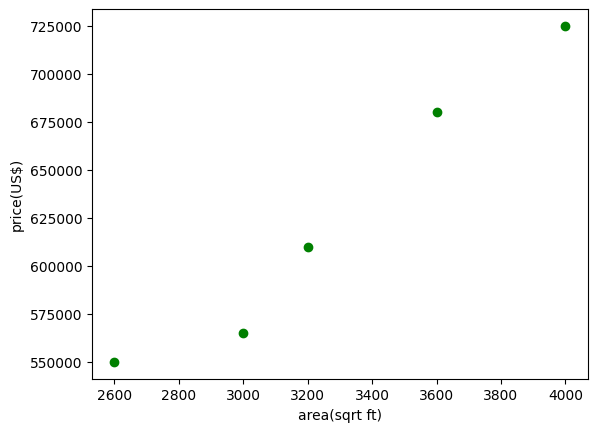

In [3]:
%matplotlib inline
plt.xlabel('area(sqrt ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='green')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

(1) Predict price of a home with area = 3300 sqr ft

In [5]:
reg.predict([[3300]])

c:\Users\Fahmid Bin Mosaraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

np.float64(180616.43835616432)

Y = m * X + b (m is coefficient and b is intercept)

In [8]:
13300*135.78767123 + 180616.43835616432

1986592.4657151643

(1) Predict price of a home with area = 5000 sqr ft

In [9]:

reg.predict([[5000]])

c:\Users\Fahmid Bin Mosaraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

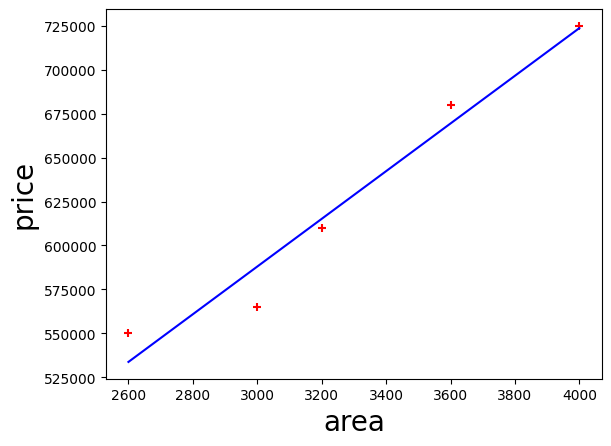

In [10]:
%matplotlib inline
plt.xlabel('area', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area,reg.predict(df[['area']]), color='blue')

Generate CSV file with list of home price predictions

In [11]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [12]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [13]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [14]:
area_df.to_csv("prediction.csv")